In [1]:
import face_recognition
import os
import numpy as np
import glob
from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt

# Step1. 사진 모으기 

- 파일명은 장동건.jpg, 김태희.png와 같이 파일명에 사람 이름이 들어 있도록 하는 것이 좋다

- 내 사진을 2장 이상 포함합시다.

### Face image 파일 리스트 

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/croped'

file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['사쿠라.jpg', '아이즈원김채원.jpg', '비니.jpg', '신비.jpg', '나탈리엠마뉴엘.jpeg', '매드클라운.jpeg', '임윤.jpg', '키이라나이틀리.jpg', '채연.jpg', '김아중.jpg', '리아.jpg', '트와이스미나.jpg', '장근희A.jpg', '여자아이들수진.jpeg', '윤아.jpg', '제시카 비엘.jpg', '아이유.jpg', '메간폭스.jpg', '승희.jpeg', '에바그린.jpg', '유리.jpg', '아만다사이프리드.jpeg', '도아.jpeg', '장근희D.jpg', '트와이스나연.jpg', '엠버허드.jpg', '트와이스다현.jpeg', '나탈리 포트만.jpg', '아이즈원조유리.jpeg', '맥켄지포이.jpeg', 'trump.jpg', '트와이스사나.jpg', '엘리자베스테일러.jpeg', '앤헤서웨이.jpeg', '수지.jpg', '나인뮤지스경리.jpg', '레드벨벳웬디.jpg', 'biden.jpg', '장원영.jpeg', '클레어 모레츠.jpeg', '전소미.jpg', '손담비.jpg', '트와이스쯔위.jpg', '공효진.jpg', '러블리즈지수.jpeg', '심혜진.jpeg', '크리스탈.jpg', '강미나.jpg', '손예진.jpg', '이연희.jpg', '장근희C.jpg', '엠마스톤.jpeg', '최희서.jpg', '레인보우재경.jpg', '잇지유나.jpg', '류진.jpg', '제니.jpg', '태연.jpg', '서현진.jpg', 'bush.jpeg', '김남주.jpeg', '민니.jpg', '지수.jpg', '강민경.jpg', '박보영.jpg', '문별.jpg', '한효주.jpg', '슬기.jpg', '이효리.jpg', '김태희.jpg', '아이즈원민주.jpg', '장도연.jpg', '바바라 팔빈.jpg', '로제.jpg', '러블리즈예인.jpg', '티파니.jpg', '김혜수.jpg', '리사.jpg', '문소리.jpg', '지호.jpg', '한고은.jpg', '

# Step2. 얼굴 영역 자르기

### Face Crop
- def get_gropped_face(image_file)
- 이미지 파일 경로를 파라미터로 받아 얼굴 영역만 잘라주는 함수

In [3]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

In [4]:
# face = get_gropped_face(dir_path)
# pillow_image = Image.fromarray(face)
# pillow_image.save(path_to_save)

# Step3. 얼굴 영역의 임베딩 추출하기

## Embedding Dictionary

- `def get_face_embedding_dict(dir_path)` 
- 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
- `사람이름` : `임베딩벡터`
```python 
embedding_dict =  get_face_embedding_dict(dir_path):
embedding_dict['obama']
```

In [7]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [8]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]          
        # 얼굴영역 face가 제대로 detect되지 않으면  
        # len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 
        # 확장자를 제거한 이름이 담깁니다.           

    return embedding_dict

In [9]:
embedding_dict = get_face_embedding_dict(dir_path)

### 내 얼굴 ABC Embedding 거리 구하기 

In [10]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [11]:
image_file_A = os.path.join(dir_path, '장근희A.jpg')
image_file_B = os.path.join(dir_path, '장근희B.jpg')
image_file_C = os.path.join(dir_path, '장근희C.jpg')

# 얼굴 영역을 구하는 함수(이전 스텝에서 구현)
face_A = get_gropped_face(image_file_A)   
face_B = get_gropped_face(image_file_B)
face_C = get_gropped_face(image_file_C)

embedding_A = get_face_embedding(face_A)  
embedding_B = get_face_embedding(face_B)  
embedding_C = get_face_embedding(face_C)  

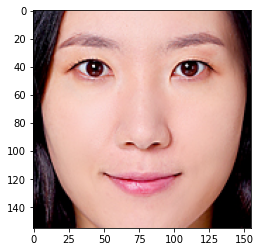

In [13]:
plt.imshow(face_A)

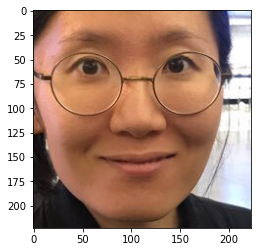

In [14]:
plt.imshow(face_B)

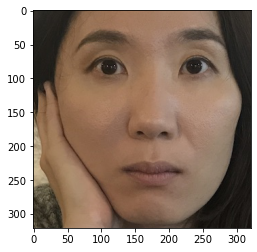

In [15]:
plt.imshow(face_C)

In [16]:
get_distance('장근희A', '장근희C')

0.37676763098367827

In [17]:
get_distance('장근희B', '장근희C')

0.35327392637457017

In [18]:
get_distance('장근희B', '김태희')

0.5478994434049416

- 김태희님 보다 장근희들 끼리의 벡터 간의 거리가 더 가까운 것을 볼 수 있다. 
- 잘 작동하고 있다는 것을 알 수 있다. 

# Step4. 모은 연예인들과 비교하기

In [20]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [23]:
def get_nearest_face(name, top=20):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [24]:
get_nearest_face('장근희B')

순위 1 : 이름(장근희C), 거리(0.35327392637457017)
순위 2 : 이름(장근희A), 거리(0.4041251210501759)
순위 3 : 이름(장근희D), 거리(0.4151083887048113)
순위 4 : 이름(김태리), 거리(0.4341553859133342)
순위 5 : 이름(공효진), 거리(0.45357458795346794)
순위 6 : 이름(박나래), 거리(0.45437002456322223)
순위 7 : 이름(화사), 거리(0.4721441512726633)
순위 8 : 이름(장도연), 거리(0.47705949967873323)
순위 9 : 이름(케이), 거리(0.48527962980908357)
순위 10 : 이름(심혜진), 거리(0.4913557356713179)
순위 11 : 이름(손담비), 거리(0.4955130009535942)
순위 12 : 이름(레인보우재경), 거리(0.49637786408234863)
순위 13 : 이름(채연), 거리(0.49883941534677645)
순위 14 : 이름(문소리), 거리(0.5041316705872821)
순위 15 : 이름(태연), 거리(0.5045838687333012)
순위 16 : 이름(아이유), 거리(0.5069824985333556)
순위 17 : 이름(손예진), 거리(0.5073129669162593)
순위 18 : 이름(김희애), 거리(0.5078052864562539)
순위 19 : 이름(트와이스모모), 거리(0.5082606167470791)
순위 20 : 이름(유리), 거리(0.5088952360007171)


# Step5. 다양한 재미있는 시각화 시도해 보기